In [36]:
# Instalamos el paquete ipympl si no está instalado (solo funciona en notebooks como Jupyter)
# Permite que matplotlib tenga gráficos interactivos (por ejemplo, con zoom o clics)
!pip install ipympl

# Importamos la librería pyabf, que se usa para leer archivos ABF (Axon Binary Files)
import pyabf

# Importamos la librería matplotlib.pyplot, que sirve para generar gráficos
import matplotlib.pyplot as plt

# Activamos el modo de gráficos interactivos en Jupyter usando el backend "widget"
# Esto permite interactuar con el gráfico, como hacer zoom o moverlo
%matplotlib widget

# Importamos todas las funciones matemáticas estándar, como sin(), cos(), exp(), etc.
# Nota: usar 'import *' puede causar conflictos de nombres, por eso hay que usarlo con cuidado
from math import *

# Importamos la clase MouseButton, que permite detectar qué botón del mouse se ha hecho clic en un gráfico
from matplotlib.backend_bases import MouseButton

# Importamos la librería NumPy con el alias np, útil para operaciones numéricas y manejo de arrays
import numpy as np

# Importamos solve_ivp, una función de SciPy para resolver ecuaciones diferenciales ordinarias (ODEs)
from scipy.integrate import solve_ivp

# Importamos fsolve, una función de SciPy para resolver ecuaciones no lineales (buscar raíces de funciones)
from scipy.optimize import fsolve

# Definimos la ruta al archivo .abf que contiene los datos de registro electrofisiológico
file_path = "bursting/cell89basal.abf"  # Asegúrate de que este archivo exista en esa ruta

# Usamos pyabf para cargar el archivo ABF, creando un objeto que contiene toda la información del experimento
abf = pyabf.ABF(file_path)

# Imprimimos un resumen del archivo ABF cargado:
# muestra cuántos barridos (sweeps) hay, la duración del experimento, frecuencia de muestreo, etc.
print(abf)

Defaulting to user installation because normal site-packages is not writeable
ABF (v2.6) with 1 channel (pA), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 11.11 minutes, recorded without a protocol file.


In [37]:
# Imprime la ruta completa del archivo ABF cargado
# El formato {:>20} alinea el texto a la derecha ocupando 20 espacios
print(f"{'File Path:':>20} {abf.abfFilePath}")

# Imprime la versión del archivo ABF (por ejemplo, 2.0.4)
print(f"{'File Version:':>20} {abf.abfVersionString}")

# Imprime la frecuencia de muestreo del registro (en Hz)
# Esta es la cantidad de puntos de datos por segundo, muy importante en señales biológicas
print(f"{'Sampling Rate:':>20} {abf.dataRate} Hz")

# Imprime el número total de barridos (sweeps) en el archivo
# Cada sweep es una repetición del protocolo experimental
print(f"{'Total Sweeps:':>20} {abf.sweepCount}")

# Imprime los nombres de los canales de entrada analógica (ADC)
# Por ejemplo: voltajes registrados de membrana en diferentes electrodos
print(f"{'ADC Channels:':>20} {abf.adcNames}")

# Imprime los nombres de los canales de salida analógica (DAC)
# Se usan para aplicar estímulos (por ejemplo, pulsos de corriente o voltaje)
print(f"{'DAC Channels:':>20} {abf.dacNames}")

# Imprime las unidades del eje Y (por ejemplo, "mV" si es voltaje)
print(f"{'Channel Units:':>20} {abf.sweepUnitsY}")

# Imprime la fecha y hora en que se realizó el experimento
print(f"{'Experiment Date:':>20} {abf.abfDateTime}")

          File Path: c:\Users\manur\Desktop\python\bursting\cell89basal.abf
       File Version: 2.6.0.0
      Sampling Rate: 10000 Hz
       Total Sweeps: 30
       ADC Channels: ['Waveform']
       DAC Channels: ['AO #0']
      Channel Units: pA
    Experiment Date: 2024-11-08 00:00:50.086000


In [38]:
# Creamos una lista de métodos (funciones) del objeto `abf`
# Usamos `dir(abf)` para obtener todos los atributos y métodos del objeto `abf`
# Luego filtramos solo los que son 'callables', es decir, funciones o métodos que se pueden ejecutar
# También excluimos los métodos especiales que comienzan con '__' (como __init__, __str__, etc.)

methods = [method for method in dir(abf)                      # Iteramos sobre todos los nombres de atributos y métodos
           if callable(getattr(abf, method))                  # Nos quedamos solo con los que son funciones (callables)
           and not method.startswith("__")]                   # Excluimos los métodos especiales del sistema (dunder methods)

# Imprimimos la lista de métodos disponibles, uno por línea
# Esto nos da una visión general de qué acciones podemos ejecutar con el objeto `abf`
print("\n".join(methods))

_dtype
_getAdcNameAndUnits
_getDacNameAndUnits
_ide_helper
_loadAndScaleData
_makeAdditionalVariables
_readHeadersV1
_readHeadersV2
getAllXs
getAllYs
headerLaunch
launchInClampFit
saveABF1
setSweep
sweepD


In [39]:
# Imprime el rastro de voltaje registrado para el barrido (sweep) actual
# `abf.sweepY` contiene los valores de voltaje (o corriente) registrados durante ese barrido
# Estos valores suelen estar en milivoltios (mV) si se trata de registros de potencial de membrana
print(f"{'Voltage Trace (mV):':>25} {abf.sweepY}")

# Imprime la señal de comando aplicada por el DAC durante el barrido actual, si está disponible
# `abf.sweepC` representa la señal de control aplicada al sistema, como un protocolo de estimulación
# Puede ser una onda cuadrada, un escalón de corriente, etc., y también suele estar en mV
print(f"{'Command Input (mV):':>25} {abf.sweepC}")

      Voltage Trace (mV): [-61.2   -60.856 -61.2   ... -56.228 -56.196 -56.353]
      Command Input (mV): [0. 0. 0. ... 0. 0. 0.]


In [40]:
# Imprime la lista de índices de barridos (sweeps) disponibles en el archivo ABF
# `abf.sweepList` es una lista de enteros que representa todos los barridos grabados
# `map(str, abf.sweepList)` convierte cada número en texto para poder unirlos en una sola cadena
# `", ".join(...)` une todos los elementos separados por comas
print("List of sweep indexes:", ", ".join(map(str, abf.sweepList)))

List of sweep indexes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29


In [41]:
# Elegimos un barrido específico para analizar (por ejemplo, el primer barrido tiene índice 0)
sweep_index = 0  

# Configuramos el objeto ABF para que cargue los datos del barrido especificado
# Esto inicializa las variables abf.sweepX, abf.sweepY y abf.sweepC para ese barrido
abf.setSweep(sweep_index)  

# Imprimimos el trazo de voltaje (señal grabada) del barrido seleccionado
# sweepY contiene los valores de la señal registrada (por ejemplo, potencial de membrana en mV)
print(f"{'Voltage Trace (mV):':>25} {abf.sweepY}")

# Imprimimos la señal de comando aplicada durante el barrido (si hay una)
# sweepC representa la señal enviada por el sistema (por ejemplo, para estimular la célula)
print(f"{'Command Input (mV):':>25} {abf.sweepC}")

# Mostramos todos los nombres de los canales de entrada (ADC), es decir, los canales grabados
# Por ejemplo: ['IN 0', 'IN 1'] podrían representar diferentes electrodos
print(f"{'Recorded Channels:':>25} {abf.adcNames}")

# Mostramos los nombres de los canales de salida (DAC), que indican las señales de comando aplicadas
# Por ejemplo: ['OUT 0'] si se aplicó una señal a través de ese canal
print(f"{'Command Channels:':>25} {abf.dacNames}")

      Voltage Trace (mV): [-61.2   -60.856 -61.2   ... -56.228 -56.196 -56.353]
      Command Input (mV): [0. 0. 0. ... 0. 0. 0.]
       Recorded Channels: ['Waveform']
        Command Channels: ['AO #0']


In [42]:
# Instalamos seaborn, una librería de visualización estadística
# Solo necesario si aún no está instalada (útil en notebooks)
!pip install seaborn

# === ANÁLISIS ESTADÍSTICO Y VISUALIZACIÓN DE UN TRAZO DE VOLTAJE ===

# Obtenemos el trazo de voltaje (ya debes haber hecho abf.setSweep(sweep_index) antes)
# Este array contiene los valores de voltaje (en mV) grabados en el sweep actual
data = abf.sweepY  

# Calculamos estadísticas básicas sobre ese trazo
# Estas medidas ayudan a entender la forma general del trazo
stats = {
    "Mean (mV)": np.mean(data),        # Promedio
    "Median (mV)": np.median(data),    # Mediana
    "Min (mV)": np.min(data),          # Valor mínimo
    "Max (mV)": np.max(data),          # Valor máximo
    "Std Dev (mV)": np.std(data),      # Desviación estándar
    "Range (mV)": np.ptp(data),        # Rango (pico a pico): max - min
}

# Imprimimos las estadísticas calculadas, con formato alineado y 3 decimales
print("\nVoltage Trace Statistics:")
for key, value in stats.items():
    print(f"{key:>20}: {value:.3f}")

Defaulting to user installation because normal site-packages is not writeable

Voltage Trace Statistics:
           Mean (mV): -55.656
         Median (mV): -56.853
            Min (mV): -66.204
            Max (mV): 49.191
        Std Dev (mV): 9.172
          Range (mV): 115.395


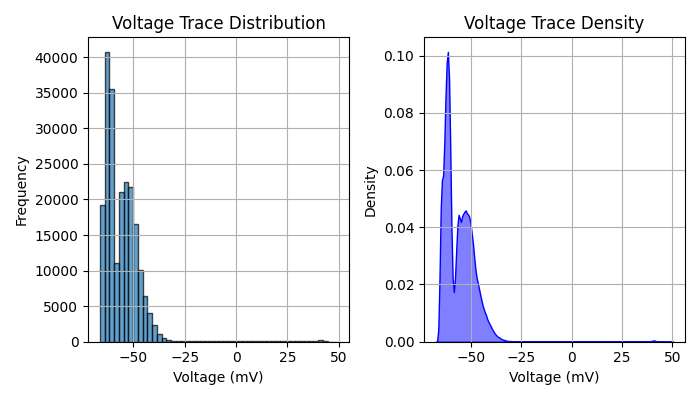

In [43]:
# === VISUALIZACIÓN: HISTOGRAMA Y CURVA DE DENSIDAD ===

# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Usada para el gráfico KDE (estimación de densidad)

# Creamos una figura con dos subgráficos (1 fila, 2 columnas)
# Esto nos permite comparar fácilmente el histograma con la densidad suavizada
fig, axes = plt.subplots(1, 2, figsize=(7, 4))  # Figura de 7x4 pulgadas

# Primer subgráfico: Histograma de los voltajes
axes[0].hist(data, bins=50, edgecolor='black', alpha=0.7)  # 50 barras con borde negro y transparencia
axes[0].set_xlabel("Voltage (mV)")                         # Etiqueta del eje X
axes[0].set_ylabel("Frequency")                            # Etiqueta del eje Y
axes[0].set_title("Voltage Trace Distribution")            # Título del subgráfico
axes[0].grid(True)                                         # Activar grilla

# Segundo subgráfico: KDE (curva de densidad suavizada)
sns.kdeplot(
    data,                  # Datos del voltaje
    bw_adjust=0.5,         # Ajuste de suavizado (0.5 = menos suavizado)
    fill=True,             # Rellenar debajo de la curva
    color="b",             # Azul
    alpha=0.5,             # Transparencia
    ax=axes[1]             # Dibujar en el segundo subgráfico
)
axes[1].set_xlabel("Voltage (mV)")
axes[1].set_ylabel("Density")
axes[1].set_title("Voltage Trace Density")
axes[1].grid(True)

# Ajustamos el diseño para que no haya elementos solapados
plt.tight_layout()

# Mostramos la figura completa con ambos gráficos
plt.show()

In [44]:
def plot_abf():
    # Creamos una figura con un tamaño de 8x5 pulgadas
    plt.figure(figsize=(8, 5))

    # Iteramos sobre todos los índices de barrido disponibles en el archivo
    for sweepNumber in abf.sweepList:
        # Cargamos los datos del barrido actual
        abf.setSweep(sweepNumber)

        # Definimos un desplazamiento vertical para este barrido (para no solaparlo con otros)
        # Cada barrido se eleva 140 unidades respecto al anterior
        offset = 140 * sweepNumber

        # Graficamos el trazo del voltaje con el desplazamiento aplicado
        # sweepX es el eje del tiempo, sweepY es el voltaje, desplazado con `+ offset`
        # color azul (b), línea muy fina (lw=0.1) para distinguir múltiples trazos
        plt.plot(abf.sweepX, abf.sweepY + offset, color='b', lw=0.1)

    # Ocultamos el eje Y, ya que el desplazamiento vertical es artificial y no tiene unidad real
    plt.gca().get_yaxis().set_visible(False)

    # Agregamos el título del gráfico con la ruta del archivo
    plt.title(file_path)

    # Etiqueta del eje X, tomada directamente de la metadata del archivo ABF
    plt.xlabel(abf.sweepLabelX)

    # Mostramos el gráfico final
    plt.show()

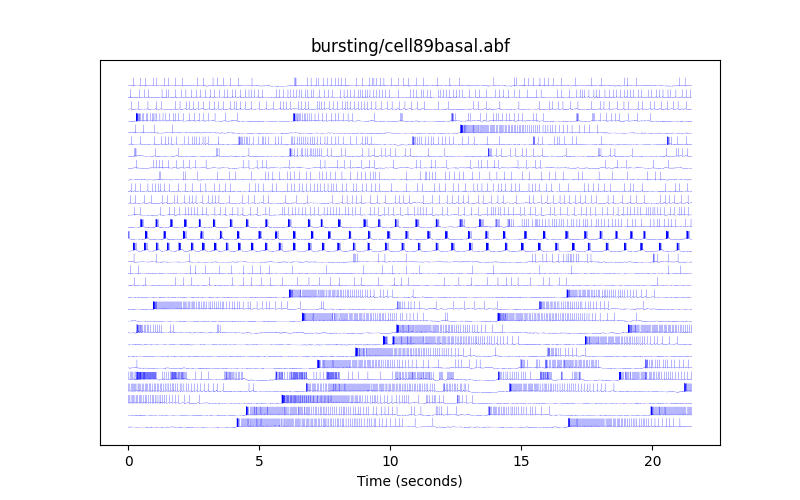

In [45]:
plot_abf()

ABF (v2.6) with 1 channel (pA), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 11.11 minutes, recorded without a protocol file.


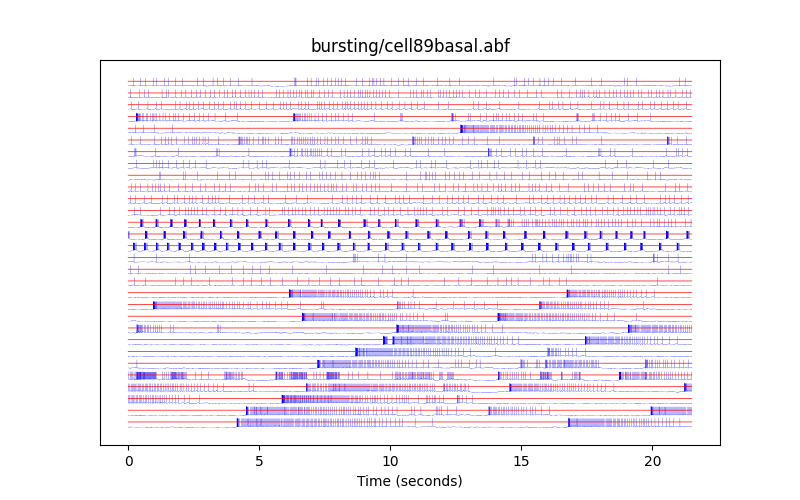

In [46]:
# =============================
# CARGA DEL ARCHIVO ABF
# =============================

# Definimos la ruta al archivo ABF que contiene los datos del experimento
file_path = "bursting/cell89basal.abf"  # Select the ABF file

# Importamos pyabf y cargamos el archivo
import pyabf
abf = pyabf.ABF(file_path)  # Load it

# Imprimimos un resumen con las características básicas del archivo:
# número de barridos (sweeps), duración, frecuencia de muestreo, canales, etc.
print(abf)  # Record characteristics

# =============================
# FUNCIÓN PARA GRAFICAR TODOS LOS BARRIDOS
# =============================

# Importamos las bibliotecas necesarias para graficar
import matplotlib.pyplot as plt

# Definimos una función que grafica todos los barridos registrados y sus señales de comando
def plot_abf():
    # Creamos una figura con tamaño de 8x5 pulgadas
    plt.figure(figsize=(8, 5))

    # Iteramos sobre todos los barridos disponibles en el archivo
    for sweepNumber in abf.sweepList:
        # Cargamos el barrido actual (voltaje, tiempo y señal de comando)
        abf.setSweep(sweepNumber)

        # Desplazamos verticalmente cada barrido para separarlos visualmente
        offset = 140 * sweepNumber

        # Graficamos el trazo de voltaje (registrado) en azul, con línea fina
        plt.plot(abf.sweepX, abf.sweepY + offset, color='b', lw=0.1)  # Recorded signal

        # Graficamos la señal de comando aplicada (si existe) en rojo, más visible
        plt.plot(abf.sweepX, abf.sweepC + offset, color='r', lw=0.5)  # Command waveform

    # Ocultamos el eje Y, ya que las posiciones verticales son artificiales
    plt.gca().get_yaxis().set_visible(False)

    # Mostramos el nombre del archivo como título del gráfico
    plt.title(file_path)

    # Etiquetamos el eje X con la unidad de tiempo del archivo (por ejemplo, "seconds")
    plt.xlabel(abf.sweepLabelX)

    # Mostramos el gráfico
    plt.show()


# =============================
# EJECUTAR LA FUNCIÓN DE GRAFICADO
# =============================

# Llamamos a la función que muestra todos los barridos con sus señales de entrada y salida
plot_abf()

ABF (v2.6) with 1 channel (pA), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 11.11 minutes, recorded without a protocol file.


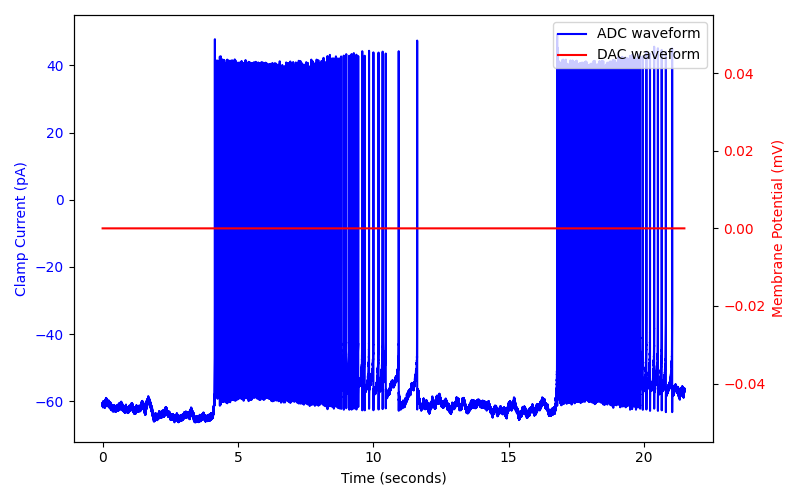

In [47]:
# =============================
# IMPORTACIÓN DE LIBRERÍAS
# =============================

# Importamos pyabf para cargar archivos ABF
import pyabf  # Load pyABF

# Importamos matplotlib para graficar
import matplotlib.pyplot as plt

# =============================
# CARGA DEL ARCHIVO ABF
# =============================

# Ruta al archivo ABF
file_path = "bursting/cell89basal.abf"  # Select the ABF file

# Cargamos el archivo
abf = pyabf.ABF(file_path)  # Load it

# Mostramos resumen de las propiedades del archivo
print(abf)  # Record characteristics

# =============================
# CONFIGURAMOS EL BARRIDO A GRAFICAR
# =============================

# Seleccionamos el barrido que queremos mostrar (por ejemplo, el primero)
sweep_index = 0
abf.setSweep(sweep_index)  # Cargar ese barrido

# =============================
# GRAFICADO CON DOS EJES Y
# =============================

# Creamos figura y primer eje (eje izquierdo)
fig, ax1 = plt.subplots(figsize=(8, 5))  # Tamaño 8x5 pulgadas

# Graficamos la señal registrada (ADC) en azul
ax1.plot(abf.sweepX, abf.sweepY, color='b', label="ADC waveform")
ax1.set_xlabel(abf.sweepLabelX)               # Etiqueta del eje X (e.g., 'seconds')
ax1.set_ylabel(abf.sweepLabelY, color='b')    # Etiqueta del eje Y izquierdo (e.g., 'mV')
ax1.tick_params(axis='y', labelcolor='b')     # Colorear ticks del eje Y en azul

# Creamos un segundo eje (eje derecho), compartiendo el eje X
ax2 = ax1.twinx()

# Graficamos la señal de comando (DAC) en rojo
ax2.plot(abf.sweepX, abf.sweepC, color='r', label="DAC waveform")
ax2.set_ylabel(abf.sweepLabelC, color='r')    # Etiqueta del eje Y derecho
ax2.tick_params(axis='y', labelcolor='r')     # Colorear ticks del eje Y en rojo


# =============================
# LEYENDA Y DISEÑO
# =============================

# Combinamos leyendas de ambos ejes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')  # Leyenda en la esquina superior derecha

# Ajustamos automáticamente el diseño
fig.tight_layout()

# Mostramos el gráfico final
plt.show()

DETECCIÓN DE SPIKES

In [48]:
# =============================
# IMPORTACIÓN DE LIBRERÍAS
# =============================

# Librerías científicas y de datos
import numpy as np              # Álgebra lineal y operaciones con arrays
import pandas as pd            # Manipulación de datos en forma de tabla (DataFrame)

# Lectura de archivos ABF (electrofisiología)
import pyabf                   # Manejo de archivos .abf (Axon Binary File)

# Librerías de procesamiento de señales y estadística
import scipy                   # Biblioteca científica general
from scipy import signal       # Procesamiento de señales (filtrado, análisis espectral, etc.)
from scipy.signal import find_peaks       # Detección de picos en señales 1D
from scipy.optimize import curve_fit      # Ajuste de curvas a modelos no lineales
from scipy.stats import skew, kurtosis    # Estadísticas: asimetría (skew) y curtosis

# Visualización de datos
import matplotlib.pyplot as plt           # Gráficos y visualizaciones

In [49]:
# =============================
# CARGA Y PREVISUALIZACIÓN DE ARCHIVO ABF
# =============================

# Ruta del archivo ABF que se desea analizar
data = file_path  # file_path debe ser una cadena con la ruta completa al archivo .abf

# Cargamos el archivo ABF usando pyabf
abf = pyabf.ABF(data)

# Mostramos información general del archivo cargado:
# como número de barridos (sweeps), duración, frecuencia de muestreo, etc.
print(abf)

ABF (v2.6) with 1 channel (pA), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 11.11 minutes, recorded without a protocol file.


In [50]:
# =============================
# FILTRADO DE LA SEÑAL ABF
# =============================

# Frecuencia de muestreo (Hz)
# abf.dataPointsPerMs está en puntos por milisegundo, por eso se multiplica por 1000
fs = int(abf.dataPointsPerMs * 1000)

# Diseño de filtro pasa bajos Bessel (orden 4, corte en 2000 Hz)
b_lowpass, a_lowpass = signal.bessel(
    4,          # Orden del filtro
    2000,       # Frecuencia de corte (Hz)
    'low',      # Tipo: pasa bajos
    analog=False,       # Especifica que es un filtro digital
    norm='phase',       # Normalización para preservar la fase
    fs=fs               # Frecuencia de muestreo del sistema
)

# Aplicación del filtro pasa bajos a la señal de voltaje (abf.sweepY)
# filtfilt aplica el filtro hacia adelante y hacia atrás (sin desfase de fase)
signal_filtered = signal.filtfilt(b_lowpass, a_lowpass, abf.sweepY)


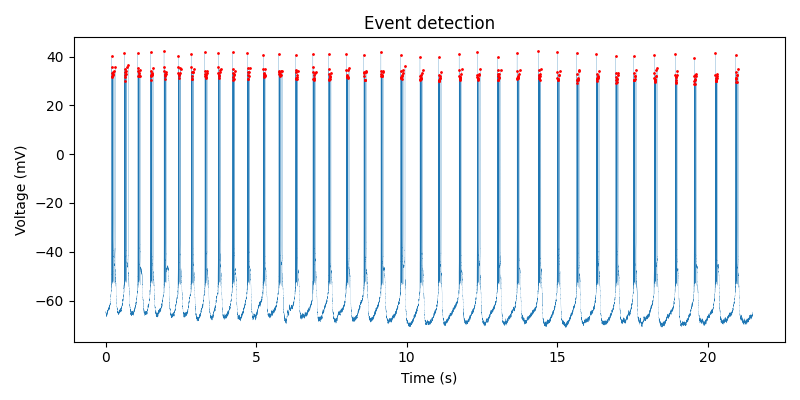

,spike,spike_index,spike_time,inst_freq,isi_s,width,rise_half_ms,decay_half_ms,spike_peak,spike_amplitude
0,1,1933,0.1933,inf,0.0000,0.567354,0.203017,0.364337,40.091000,105.951000
1,2,1985,0.1985,192.307692,0.0052,0.576342,0.178124,0.398218,35.776001,92.254002
2,3,2041,0.2041,178.571429,0.0056,0.582079,0.170146,0.411933,33.273998,86.373997
3,4,2105,0.2105,156.250000,0.0064,0.616574,0.239908,0.376665,32.084999,85.059998
4,5,2177,0.2177,138.888889,0.0072,0.636234,0.183315,0.452919,31.554001,83.778999
...,...,...,...,...,...,...,...,...,...,...
352,353,209610,20.9610,138.888889,0.0072,0.646102,0.235399,0.410703,31.334999,83.966000
353,354,209692,20.9692,121.951220,0.0082,0.659416,0.185940,0.473476,29.677000,81.651999
354,355,209800,20.9800,92.592593,0.0108,0.648763,0.201138,0.447625,32.304001,85.528999
355,356,209944,20.9944,69.444444,0.0144,0.650395,0.187382,0.463013,32.522999,85.935997


In [51]:
# =============================
# DETECCIÓN DE PICOS EN LA SEÑAL
# =============================

# Asignamos las variables necesarias
abf.setSweep(15)                     # Seleccionamos el sweep (barrido) número 15
time = abf.sweepX                    # Vector de tiempo (s)
peaks_signal = abf.sweepY            # Señal original (puedes usar signal_filtered si prefieres la versión filtrada)

# -----------------------------
# PARÁMETROS PARA LA DETECCIÓN DE PICOS
# -----------------------------

thresh_min = -25                                # Umbral mínimo absoluto (mV)
thresh_prominence = 15                          # Prominencia mínima (diferencia pico-fondo)
thresh_min_width = 0.5 * (fs / 1000)            # Ancho mínimo (en muestras), equivalente a 0.5 ms
distance_min = 1 * (fs / 1000)                  # Distancia mínima entre picos (en muestras), equivalente a 1 ms
pretrigger_window = (1.5 * fs) / 1000           # (opcional) Tiempo antes del evento
posttrigger_window = (2 * fs) / 1000            # (opcional) Tiempo después del evento

# -----------------------------
# DETECCIÓN DE PICOS
# -----------------------------

# Utilizamos find_peaks de scipy para detectar eventos
peaks, peaks_dict = find_peaks(
    peaks_signal,                  # Señal de entrada
    height=thresh_min,             # Altura mínima
    threshold=thresh_min,          # Umbral absoluto mínimo
    distance=distance_min,         # Distancia mínima entre eventos
    prominence=thresh_prominence,  # Prominencia mínima
    width=thresh_min_width,        # Ancho mínimo a media altura
    wlen=None,                     # Longitud de ventana para cálculo de prominencia
    rel_height=0.5,                # Altura relativa para medir ancho
    plateau_size=None              # Ignora mesetas planas (por defecto)
)

# =============================
# TABLA DE RESULTADOS
# =============================

# Creamos un DataFrame para almacenar los resultados de cada spike detectado
spikes_table = pd.DataFrame(columns=[
    'spike', 'spike_index', 'spike_time',
    'inst_freq', 'isi_s',
    'width', 'rise_half_ms', 'decay_half_ms',
    'spike_peak', 'spike_amplitude'
])

# Asignamos los datos calculados a cada columna
spikes_table.spike = np.arange(1, len(peaks) + 1)
spikes_table.spike_index = peaks
spikes_table.spike_time = peaks / fs                                   # Tiempo de cada spike (s)
spikes_table.isi_s = np.diff(peaks, axis=0, prepend=peaks[0]) / fs     # Intervalos inter-spike (s)
spikes_table.inst_freq = 1 / spikes_table.isi_s                        # Frecuencia instantánea (Hz)
spikes_table.width = peaks_dict['widths'] / (fs / 1000)                # Ancho del pico (ms)
spikes_table.rise_half_ms = (peaks - peaks_dict['left_ips']) / (fs / 1000)
spikes_table.decay_half_ms = (peaks_dict['right_ips'] - peaks) / (fs / 1000)
spikes_table.spike_peak = peaks_dict['peak_heights']                   # Valor de voltaje en el pico
spikes_table.spike_amplitude = peaks_dict['prominences']               # Amplitud (prominencia)

# =============================
# VISUALIZACIÓN DE LA SEÑAL CON PICOS DETECTADOS
# =============================

# Creamos una figura y un eje para graficar
fig, ax = plt.subplots(figsize=(8, 4))

# Trazamos la señal completa
ax.plot(time, peaks_signal, lw=0.1)

# Añadimos puntos rojos donde se detectaron los picos
ax.plot(peaks / fs, peaks_signal[peaks], "r.", markersize=2)

# (Opcional) Etiquetar cada pico con un número:
# for i, txt in enumerate(spikes_table.spike):  
#     ax.annotate(txt, (peaks[i]/fs, peaks_signal[peaks][i]))

# Etiquetas y título del gráfico
ax.set_title("Event detection")  
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (mV)")

# (Opcional) Zoom a una región específica
# ax.set_xlim(0.4, 0.9)

# Ajustamos el diseño y mostramos la figura
fig.tight_layout()
plt.show()

# Mostramos la tabla resultante
spikes_table

In [52]:
# Assign ISI data to this variable
hist_data = spikes_table['isi_s']
 
# Empty DataFrame for histogram stats
hist_stats = pd.DataFrame()
 
# Bin size
bin_size = 10  # in miliseconds
 
# Histogram
isi_range = np.ptp(hist_data)
bins = int((isi_range * 1000 / bin_size) + 0.5)  # Round to the nearest integer
hist = np.histogram(hist_data, bins=bins)
hist_counts = hist[0]
hist_bins = hist[1]
 
# Cumulative moving average
cum = np.cumsum(hist_counts)  # Cumulative sum
cma = cum / np.arange(1, len(cum) + 1)
 
# Calculate peaks and valleys of the cma
cma_peaks_indexes = scipy.signal.argrelextrema(cma, np.greater)
cma_valleys_indexes = scipy.signal.argrelextrema(cma, np.less)
 
# Select the peak you're interested in
peak_index = cma_peaks_indexes[0][0]  # Change second number to select the peak
alpha = cma[peak_index] * 0.5  # Half-peak, adapt the value to your threshold criterion
 
# Calculate cma_threshold_index relative to the selected cma_peak
cma_threshold = (np.argmin(cma[peak_index:] >= alpha) + peak_index) * bin_size/1000
 
# Dataframe with histogram statistics
length = len(hist_stats)
hist_stats.loc[length, 'mean_isi'] = np.mean(hist_data)
hist_stats.loc[length, 'median_isi'] = np.median(hist_data)
hist_stats.loc[length, 'kurtosis'] = kurtosis(hist_counts)
hist_stats.loc[length, 'skewness'] = skew(hist_counts, bias=True)
hist_stats.loc[length, 'cma_threshold'] = cma_threshold
hist_stats.loc[length, 'cma_valley_time'] = cma_valleys_indexes[0][1] * bin_size/1000  # Change peak index as needed
hist_stats.loc[length, 'cma_peak_time'] = cma_peaks_indexes[0][0] * bin_size/1000  # Change peak index as needed
 
# Plot ISI histogram
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("ISI histogram") 
ax.hist(hist_data, bins=bins, alpha=0.6)
 
# Plot CMA
cma_x = np.linspace(np.min(hist_bins), np.max(hist_bins), bins)
ax.plot(cma_x, cma)
 
# Plot CMA threshold line
ax.axvline(cma_threshold, linestyle="dotted", color="gray")
 
# Plot CMA valleys
ax.plot(cma_x[cma_valleys_indexes], cma[cma_valleys_indexes], 'ko')
ax.plot(cma_x[cma_peaks_indexes], cma[cma_peaks_indexes], 'mo')
 
# ax.set_xscale('log')  # Logarithmic scale may be easier to set the threshold
ax.set_xlabel("Time bins (s)")
ax.set_ylabel("Count")
 
# Show graph and table
plt.show()
hist_stats

IndexError: index 0 is out of bounds for axis 0 with size 0

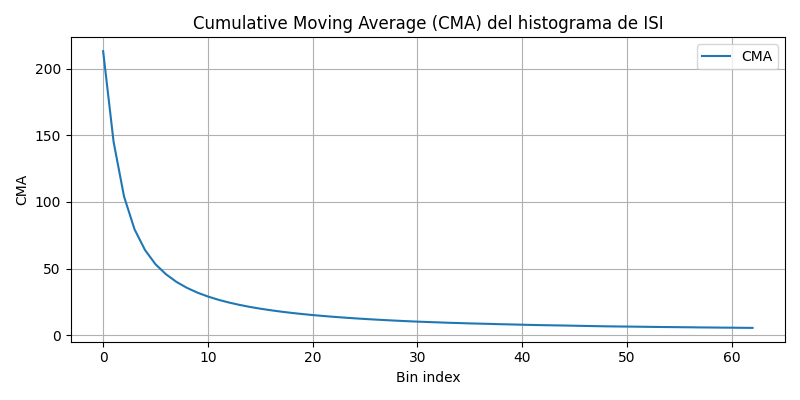

In [ ]:
# =============================
# CÁLCULO BÁSICO DEL CMA DE LOS ISI
# =============================

# Asignamos los datos de ISI (intervalos entre spikes)
hist_data = spikes_table['isi_s']  # En segundos

# Creamos un DataFrame vacío para estadísticas (opcional aquí)
hist_stats = pd.DataFrame()

# -----------------------------
# CONFIGURACIÓN DEL HISTOGRAMA
# -----------------------------

bin_size = 10  # Tamaño del bin en milisegundos

# Calculamos el rango de los ISI y número de bins
isi_range = np.ptp(hist_data)  # Rango (máx - mín)
bins = int((isi_range * 1000 / bin_size) + 0.5)  # Convertimos a ms y redondeamos

# Obtenemos el histograma de los ISI
hist = np.histogram(hist_data, bins=bins)
hist_counts = hist[0]  # Cantidad de eventos por bin
hist_bins = hist[1]    # Bordes de los bins

# -----------------------------
# CÁLCULO DEL CMA (Cumulative Moving Average)
# -----------------------------

mycum = np.cumsum(hist_counts)                      # Suma acumulativa
mycma = mycum / np.arange(1, len(mycum) + 1)        # Promedio acumulativo

# -----------------------------
# GRAFICAR EL CMA
# -----------------------------

plt.figure(figsize=(8, 4))
plt.plot(mycma, label='CMA')
plt.title("Cumulative Moving Average (CMA) del histograma de ISI")
plt.xlabel("Bin index")
plt.ylabel("CMA")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Burst detection & classification, example of cell number 089 (6 in the new numbering), sweep number 15

In [ ]:
# =============================
# IMPORTACIÓN DE LIBRERÍAS
# =============================

# Manejo de archivos .abf (Axon Binary File, para registros electrofisiológicos)
import pyabf

# Visualización de gráficos
import matplotlib.pyplot as plt
%matplotlib widget

# Funciones matemáticas estándar
from math import *  # (¡Úsalo con precaución! Importa todo el espacio de nombres de math)

# Manejador de eventos de ratón en matplotlib
from matplotlib.backend_bases import MouseButton

# Computación numérica
import numpy as np

# Manipulación y análisis de datos estructurados
import pandas as pd

# Librerías científicas
import scipy
from scipy import signal                  # Procesamiento de señales
from scipy.signal import find_peaks       # Detección de picos en señales
from scipy.optimize import curve_fit      # Ajuste de modelos (regresión no lineal)
from scipy.stats import skew, kurtosis    # Estadísticas de forma de distribución

# Estética avanzada para gráficos
import seaborn as sns

In [ ]:
# =============================
# CARGA DEL ARCHIVO ABF
# =============================

# Ruta al archivo ABF del experimento (asegúrate de que la carpeta y el archivo existan)
file_path_89 = "bursting/cell89basal.abf"  # Selección del archivo ABF

# Cargamos el archivo ABF usando pyABF
abf = pyabf.ABF(file_path_89)

# Mostramos en consola las características del archivo:
# número de canales, frecuencia de muestreo, duración, número de barridos, etc.
print(abf)

ABF (v2.6) with 1 channel (pA), sampled at 10.0 kHz, containing 30 sweeps, having no tags, with a total length of 11.11 minutes, recorded without a protocol file.


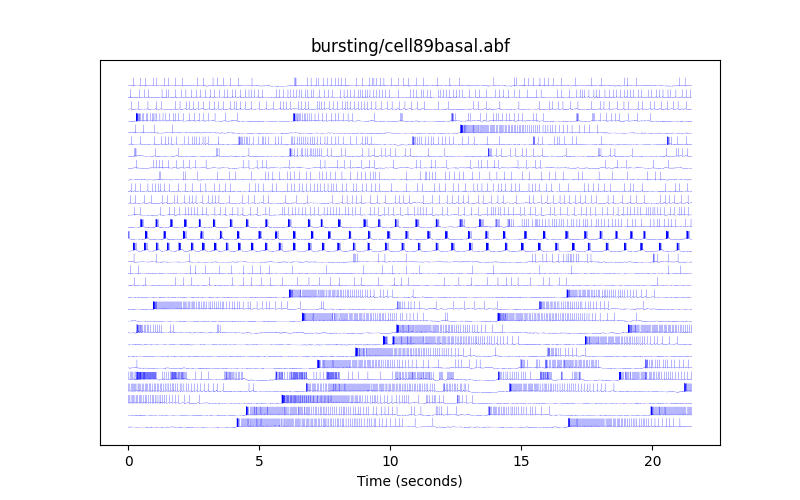

In [ ]:
def plot_abf():
    plt.figure(figsize=(8, 5))

    # Plot every sweep with vertical offset
    for sweepNumber in abf.sweepList:
        abf.setSweep(sweepNumber)
        offset = 140 * sweepNumber
        plt.plot(abf.sweepX, abf.sweepY + offset, color='b', lw=0.1)  # Recorded voltage
        #plt.plot(abf.sweepX, abf.sweepC + offset, color='r', lw=0.5)  # Command waveform in red

    # Decorate the plot
    plt.gca().get_yaxis().set_visible(False)  # Hide Y axis
    plt.title(file_path_89)
    plt.xlabel(abf.sweepLabelX)
    plt.show()

plot_abf()

In [ ]:
# =============================
# FRECUENCIA DE MUESTREO
# =============================

# La propiedad abf.dataPointsPerMs indica cuántos puntos hay por milisegundo.
# Para convertirlo a Hz (puntos por segundo), multiplicamos por 1000.
fs = int(abf.dataPointsPerMs * 1000)  # Frecuencia de muestreo en Hz

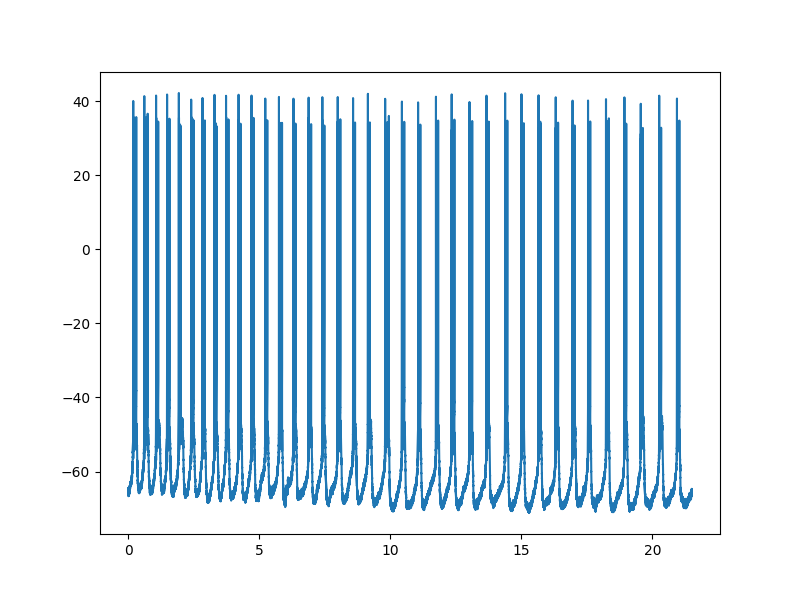

In [ ]:
# Assign the variables here to simplify the code
abf.setSweep(15)
time = abf.sweepX
peaks_signal = abf.sweepY  # Or signal_filtered

plt.figure(figsize=(8, 6))
plt.plot(time,peaks_signal)
plt.show()

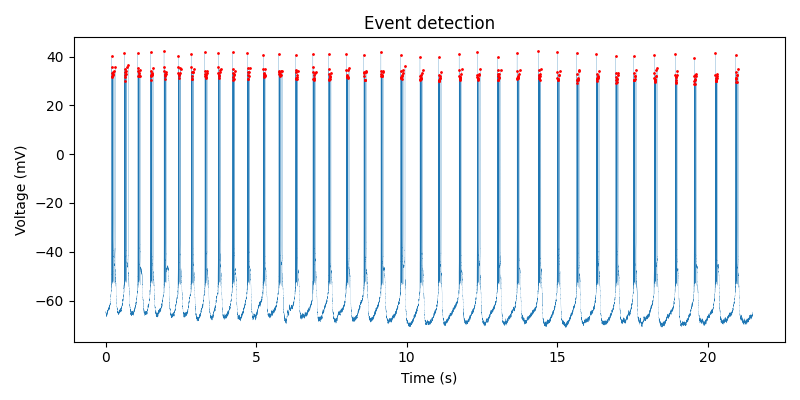

,spike,spike_index,spike_time,inst_freq,isi_s,width,rise_half_ms,decay_half_ms,spike_peak,spike_amplitude
0,1,1933,0.1933,inf,0.0000,0.567354,0.203017,0.364337,40.091000,105.951000
1,2,1985,0.1985,192.307692,0.0052,0.576342,0.178124,0.398218,35.776001,92.254002
2,3,2041,0.2041,178.571429,0.0056,0.582079,0.170146,0.411933,33.273998,86.373997
3,4,2105,0.2105,156.250000,0.0064,0.616574,0.239908,0.376665,32.084999,85.059998
4,5,2177,0.2177,138.888889,0.0072,0.636234,0.183315,0.452919,31.554001,83.778999
...,...,...,...,...,...,...,...,...,...,...
352,353,209610,20.9610,138.888889,0.0072,0.646102,0.235399,0.410703,31.334999,83.966000
353,354,209692,20.9692,121.951220,0.0082,0.659416,0.185940,0.473476,29.677000,81.651999
354,355,209800,20.9800,92.592593,0.0108,0.648763,0.201138,0.447625,32.304001,85.528999
355,356,209944,20.9944,69.444444,0.0144,0.650395,0.187382,0.463013,32.522999,85.935997


In [ ]:
# =============================
# DETECCIÓN DE PICOS EN LA SEÑAL
# =============================

# -----------------------------
# PARÁMETROS PARA FIND_PEAKS
# -----------------------------

thresh_min = -35                               # Umbral mínimo para detectar spikes (mV)
thresh_prominence = 15                         # Prominencia mínima (diferencia pico-fondo)
thresh_min_width = 0.3 * (fs / 1000)           # Ancho mínimo (en muestras), equivalente a 0.3 ms
distance_min = 1 * (fs / 1000)                 # Distancia mínima entre picos (en muestras), 1 ms
pretrigger_window = (1.5 * fs) / 1000          # Ventana antes del evento (opcional)
posttrigger_window = (2 * fs) / 1000           # Ventana después del evento (opcional)

# -----------------------------
# DETECCIÓN DE PICOS
# -----------------------------

# Aplicamos la función find_peaks a la señal (original o filtrada)
peaks, peaks_dict = find_peaks(
    peaks_signal,                 # Señal de entrada
    height=thresh_min,            # Umbral mínimo de altura
    threshold=thresh_min,         # Umbral absoluto
    distance=distance_min,        # Distancia mínima entre picos
    prominence=thresh_prominence, # Prominencia mínima
    width=thresh_min_width,       # Ancho mínimo a media altura
    wlen=None,                    # Longitud de ventana para prominencia
    rel_height=0.5,               # Altura relativa para medir el ancho
    plateau_size=None             # No se consideran mesetas
)

# -----------------------------
# TABLA DE RESULTADOS
# -----------------------------

# Creamos un DataFrame con estadísticas de cada spike detectado
spikes_table = pd.DataFrame(columns=[
    'spike', 'spike_index', 'spike_time',
    'inst_freq', 'isi_s',
    'width', 'rise_half_ms', 'decay_half_ms',
    'spike_peak', 'spike_amplitude'
])

# Rellenamos cada columna con información derivada de los picos
spikes_table.spike = np.arange(1, len(peaks) + 1)
spikes_table.spike_index = peaks
spikes_table.spike_time = peaks / fs                                # Tiempo del spike (s)
spikes_table.isi_s = np.diff(peaks, axis=0, prepend=peaks[0]) / fs # Intervalo inter-spike (s)
spikes_table.inst_freq = 1 / spikes_table.isi_s                    # Frecuencia instantánea (Hz)
spikes_table.width = peaks_dict['widths'] / (fs / 1000)            # Ancho a media altura (ms)
spikes_table.rise_half_ms = (peaks - peaks_dict['left_ips']) / (fs / 1000)
spikes_table.decay_half_ms = (peaks_dict['right_ips'] - peaks) / (fs / 1000)
spikes_table.spike_peak = peaks_dict['peak_heights']               # Valor de voltaje en el pico
spikes_table.spike_amplitude = peaks_dict['prominences']           # Amplitud (prominencia)

# =============================
# VISUALIZACIÓN DE EVENTOS DETECTADOS
# =============================

# Creamos una figura y eje
fig, ax = plt.subplots(figsize=(8, 4))

# Graficamos la señal completa
ax.plot(time, peaks_signal, lw=0.1)

# Dibujamos un punto rojo en cada pico detectado
ax.plot(peaks / fs, peaks_signal[peaks], "r.", markersize=2)

# (Opcional) Numerar cada pico detectado
# for i, txt in enumerate(spikes_table.spike):  
#     ax.annotate(txt, (peaks[i]/fs, peaks_signal[peaks][i]))

# Título y etiquetas
ax.set_title("Event detection")  
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (mV)")

# (Opcional) Zoom a una región específica
# ax.set_xlim(0.4, 0.9)

# Mostramos el gráfico y la tabla
plt.tight_layout()
plt.show()
spikes_table


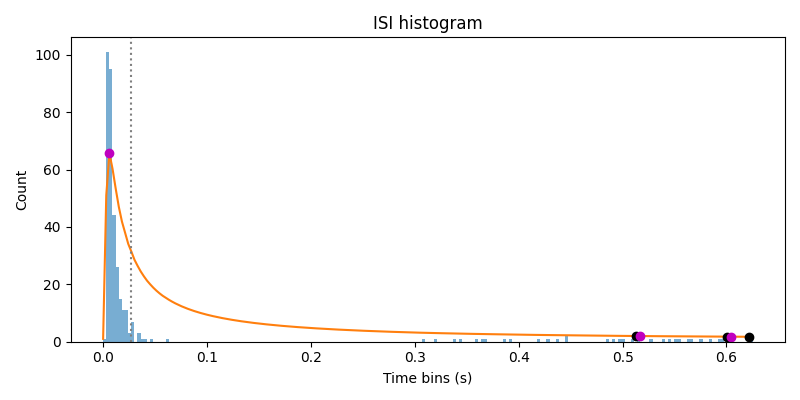

,mean_isi,median_isi,kurtosis,skewness,cma_threshold,cma_valley_time,cma_peak_time
0,0.05835,0.0082,74.182025,8.435033,0.027,0.597,0.006


In [ ]:
# ======================================
# ANÁLISIS DEL HISTOGRAMA DE ISI (Inter-Spike Interval)
# ======================================

# Extraemos los ISIs desde la tabla de spikes
hist_data = spikes_table['isi_s']  # ISI en segundos

# Inicializamos DataFrame vacío para estadísticas del histograma
hist_stats = pd.DataFrame()

# Tamaño de bin (en milisegundos)
bin_size = 3

# -----------------------------
# CONSTRUCCIÓN DEL HISTOGRAMA
# -----------------------------

# Calculamos el rango total de ISI
isi_range = np.ptp(hist_data)  # peak-to-peak

# Número de bins
bins = int((isi_range * 1000 / bin_size) + 0.5)  # Conversión a ms y redondeo

# Histograma de frecuencias
hist = np.histogram(hist_data, bins=bins)
hist_counts = hist[0]  # Conteo por bin
hist_bins = hist[1]    # Bordes de bins

# -----------------------------
# CUMULATIVE MOVING AVERAGE (CMA)
# -----------------------------

# Cálculo de la media móvil acumulada
cum = np.cumsum(hist_counts)
cma = cum / np.arange(1, len(cum) + 1)

# Identificación de máximos y mínimos locales en la CMA
cma_peaks_indexes = scipy.signal.argrelextrema(cma, np.greater)
cma_valleys_indexes = scipy.signal.argrelextrema(cma, np.less)

# Seleccionamos un pico específico de la CMA para analizar (el primero por defecto)
peak_index = cma_peaks_indexes[0][0]

# Umbral como el 50% del valor del pico seleccionado (criterio personalizado)
alpha = cma[peak_index] * 0.5

# Índice donde la CMA cruza el umbral desde el pico
cma_threshold = (np.argmin(cma[peak_index:] >= alpha) + peak_index) * bin_size / 1000  # en segundos

# -----------------------------
# ESTADÍSTICAS DEL HISTOGRAMA
# -----------------------------

# Índice de fila
length = len(hist_stats)

# Asignamos estadísticas al DataFrame
hist_stats.loc[length, 'mean_isi'] = np.mean(hist_data)
hist_stats.loc[length, 'median_isi'] = np.median(hist_data)
hist_stats.loc[length, 'kurtosis'] = kurtosis(hist_counts)
hist_stats.loc[length, 'skewness'] = skew(hist_counts, bias=True)
hist_stats.loc[length, 'cma_threshold'] = cma_threshold
hist_stats.loc[length, 'cma_valley_time'] = cma_valleys_indexes[0][1] * bin_size / 1000
hist_stats.loc[length, 'cma_peak_time'] = cma_peaks_indexes[0][0] * bin_size / 1000

# -----------------------------
# VISUALIZACIÓN DEL HISTOGRAMA + CMA
# -----------------------------

fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("ISI histogram") 

# Histograma de ISI
ax.hist(hist_data, bins=bins, alpha=0.6)

# Eje X del CMA con mismo número de puntos que bins
cma_x = np.linspace(np.min(hist_bins), np.max(hist_bins), bins)

# Graficamos la CMA
ax.plot(cma_x, cma)

# Línea de umbral de CMA
ax.axvline(cma_threshold, linestyle="dotted", color="gray")

# Marcamos valles y picos de la CMA
ax.plot(cma_x[cma_valleys_indexes], cma[cma_valleys_indexes], 'ko')  # Valles
ax.plot(cma_x[cma_peaks_indexes], cma[cma_peaks_indexes], 'mo')      # Picos

# Etiquetas de ejes
ax.set_xlabel("Time bins (s)")
ax.set_ylabel("Count")

# (Opcional) Escala logarítmica si los ISIs están muy dispersos
# ax.set_xscale('log')

# Mostramos gráfico y tabla de resultados
plt.tight_layout()
plt.show()
hist_stats

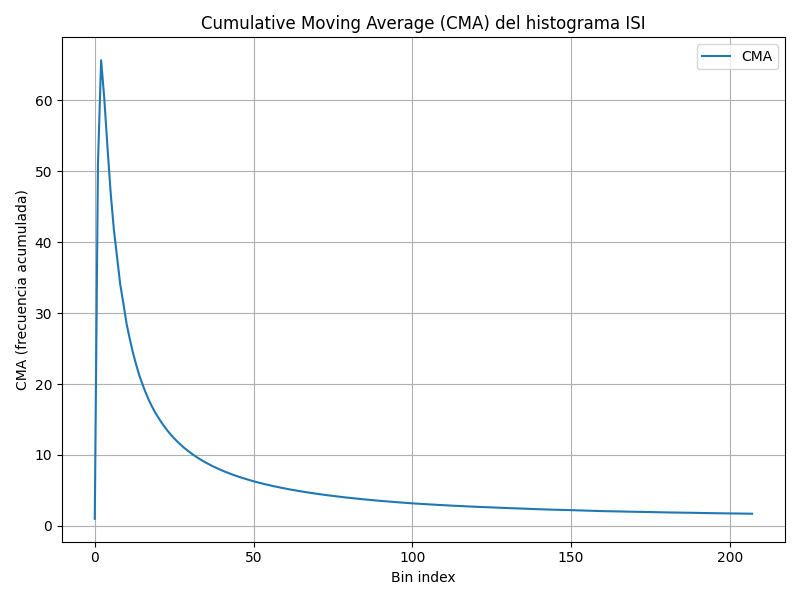

In [ ]:
# ==============================
# 1. Extraer ISIs
# ==============================
hist_data = spikes_table['isi_s']  # ISI: inter-spike intervals (en segundos)

# ==============================
# 2. Crear DataFrame vacío para estadísticos
# ==============================
hist_stats = pd.DataFrame()

# ==============================
# 3. Configurar el histograma
# ==============================
bin_size = 3  # Tamaño de bin en milisegundos
isi_range = np.ptp(hist_data)  # Rango total de ISI
bins = int((isi_range * 1000 / bin_size) + 0.5)  # Número de bins (redondeado)

# Crear histograma
hist = np.histogram(hist_data, bins=bins)
hist_counts = hist[0]  # Cantidad de eventos por bin
hist_bins = hist[1]    # Bordes de los bins

# ==============================
# 4. Calcular CMA (media acumulada móvil)
# ==============================
mycum = np.cumsum(hist_counts)  # Suma acumulada
mycma = mycum / np.arange(1, len(mycum) + 1)  # CMA

# ==============================
# 5. Graficar la CMA
# ==============================
plt.figure(figsize=(8, 6))
plt.plot(mycma, label='CMA')
plt.title("Cumulative Moving Average (CMA) del histograma ISI")
plt.xlabel("Bin index")
plt.ylabel("CMA (frecuencia acumulada)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# =============================
# CARGA Y CONFIGURACIÓN DEL BARRIDO
# =============================

# Carga el archivo ABF (Axon Binary File) usando pyabf
abf = pyabf.ABF(file_path_89)

# Selecciona el barrido número 15 para análisis
abf.setSweep(15)

# =============================
# FRECUENCIA DE MUESTREO
# =============================

# La propiedad abf.dataPointsPerMs indica cuántos puntos hay por milisegundo
# Para convertirlo a Hz (puntos por segundo), multiplicamos por 1000
fs = int(abf.dataPointsPerMs * 1000)  # Frecuencia de muestreo en Hz

# =============================
# EXTRACCIÓN DE DATOS DEL BARRIDO
# =============================

# Eje temporal del barrido (en segundos)
time = abf.sweepX

# Datos de voltaje del barrido (en milivoltios)
voltage = abf.sweepY

# =============================
# DETECCIÓN DE PICOS (SPIKES)
# =============================

# Establece un umbral de voltaje para detectar picos (por ejemplo, -35 mV)
threshold = -35

# Detecta los índices donde el voltaje supera el umbral
# Si los picos son negativos (hacia abajo), se debería invertir la señal: find_peaks(-voltage)
spike_indices, _ = find_peaks(voltage, height=threshold)

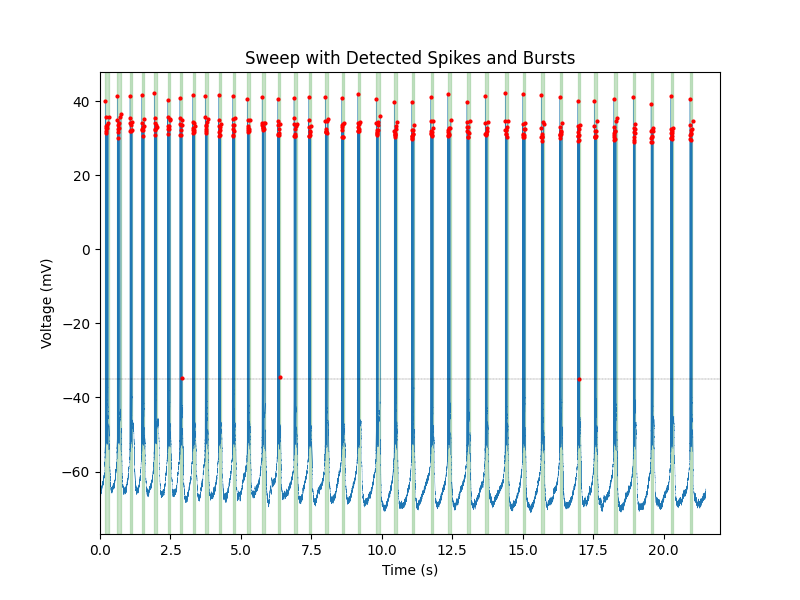

In [ ]:
# =============================
# DETECCIÓN DE PICOS (SPIKES)
# =============================

threshold = -35  # Umbral de voltaje para detectar spikes (por ejemplo, -35 mV)

# Encuentra los índices de los picos que superan el umbral
spike_indices, _ = find_peaks(voltage, height=threshold)

# Convierte los índices de los spikes a tiempos (en segundos)
spike_times = time[spike_indices]

# =============================
# DETECCIÓN DE BURSTS
# =============================

# Calcula los intervalos entre spikes consecutivos (Inter-Spike Interval, ISI)
isi = np.diff(spike_times)

burst_threshold = 0.3  # Umbral de ISI para considerar que varios spikes pertenecen a un burst (ej. 300 ms)

# Inicializa lista para almacenar bursts detectados
bursts = []
current_burst = [spike_times[0]]  # Comienza el primer burst con el primer spike

# Itera sobre los ISI para identificar bursts
for i in range(1, len(isi)):
    if isi[i - 1] < burst_threshold:
        # Si el intervalo es corto, continúa el burst actual
        current_burst.append(spike_times[i])
    else:
        # Si el intervalo es largo, termina el burst actual
        if len(current_burst) > 1:
            # Solo guarda el burst si tiene más de un spike
            bursts.append((current_burst[0], current_burst[-1]))
        # Comienza un nuevo burst
        current_burst = [spike_times[i]]

# Agrega el último burst si es válido
if len(current_burst) > 1:
    bursts.append((current_burst[0], current_burst[-1]))

# =============================
# VISUALIZACIÓN DE DATOS
# =============================

plt.figure(figsize=(8, 6))

# Traza la señal de voltaje
plt.plot(time, voltage, label='Sweep Data', lw=0.2)

# Marca los spikes detectados en rojo
plt.plot(time[spike_indices], voltage[spike_indices], 'r.', label='Spikes', markersize=4)

# Sombrea las regiones donde se detectaron bursts
for burst_start, burst_end in bursts:
    plt.axvspan(burst_start, burst_end, color='green', alpha=0.2, label='Burst')

# Dibuja una línea horizontal para el umbral de detección
plt.axhline(threshold, color='k', linestyle='--', label='Threshold', lw=0.2)

# Etiquetas del gráfico
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.title("Sweep with Detected Spikes and Bursts")
plt.xlim((0, 22))
#plt.legend()  # Puedes descomentar esta línea si deseas ver la leyenda
plt.show()

# =============================
# IMPRESIÓN DE RESULTADOS
# =============================

# Descomenta estas líneas si quieres imprimir los tiempos de inicio y fin de cada burst detectado
# for i, (burst_start, burst_end) in enumerate(bursts):
#     print(f"Burst {i + 1}: Start = {burst_start:.3f} s, End = {burst_end:.3f} s")

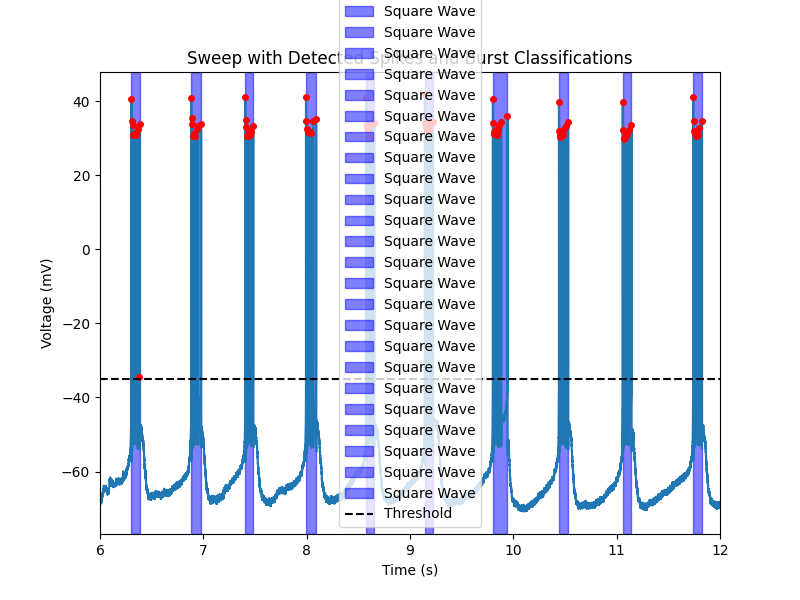

Square Wave Bursts:
  Burst 1: Start = 0.193 s, End = 0.307 s
  Burst 2: Start = 0.615 s, End = 0.744 s
  Burst 3: Start = 1.064 s, End = 1.145 s
  Burst 4: Start = 1.484 s, End = 1.574 s
  Burst 5: Start = 1.933 s, End = 2.010 s
  Burst 6: Start = 2.403 s, End = 2.491 s
  Burst 7: Start = 2.836 s, End = 2.925 s
  Burst 8: Start = 3.293 s, End = 3.367 s
  Burst 9: Start = 3.733 s, End = 3.824 s
  Burst 10: Start = 4.211 s, End = 4.286 s
  Burst 11: Start = 4.705 s, End = 4.783 s
  Burst 12: Start = 5.229 s, End = 5.306 s
  Burst 13: Start = 5.751 s, End = 5.869 s
  Burst 14: Start = 6.304 s, End = 6.382 s
  Burst 15: Start = 6.883 s, End = 6.979 s
  Burst 16: Start = 7.406 s, End = 7.483 s
  Burst 17: Start = 7.993 s, End = 8.092 s
  Burst 18: Start = 8.578 s, End = 8.654 s
  Burst 19: Start = 9.144 s, End = 9.219 s
  Burst 20: Start = 9.802 s, End = 9.944 s
  Burst 21: Start = 10.442 s, End = 10.530 s
  Burst 22: Start = 11.059 s, End = 11.144 s
  Burst 23: Start = 11.740 s, End = 11.

In [ ]:
# =============================
# CLASIFICACIÓN DE BURSTS
# =============================

# Inicializa listas para clasificar los bursts detectados
square_wave_bursts = []
parabolic_bursts = []
other_bursts = []

# Recorre cada burst detectado
for i, (burst_start, burst_end) in enumerate(bursts):
    
    # Máscara booleana para aislar la señal dentro del burst
    burst_mask = (time >= burst_start) & (time <= burst_end)
    
    # Mínimo voltaje durante el burst
    burst_min_voltage = np.min(voltage[burst_mask])

    # -----------------------------
    # Voltaje medio antes del burst
    # -----------------------------
    if i > 0:  # Si hay un burst previo
        prev_end = bursts[i - 1][1]  # Fin del burst anterior
        inter_burst_prev_mask = (time > prev_end) & (time < burst_start)
        prev_mean_voltage = np.mean(voltage[inter_burst_prev_mask])
    else:
        prev_mean_voltage = float('nan')  # Si no hay intervalo previo, usar NaN

    # -----------------------------
    # Voltaje medio después del burst
    # -----------------------------
    if i < len(bursts) - 1:  # Si hay un burst siguiente
        next_start = bursts[i + 1][0]  # Inicio del siguiente burst
        inter_burst_next_mask = (time > burst_end) & (time < next_start)
        next_mean_voltage = np.mean(voltage[inter_burst_next_mask])
    else:
        next_mean_voltage = float('nan')  # Si no hay intervalo siguiente, usar NaN

    # -----------------------------
    # Promedio del voltaje entre bursts
    # -----------------------------
    inter_burst_mean = np.nanmean([prev_mean_voltage, next_mean_voltage])

    # -----------------------------
    # Clasificación del burst
    # -----------------------------
    if burst_min_voltage > inter_burst_mean:
        square_wave_bursts.append((burst_start, burst_end))  # Más alto → forma cuadrada
    elif burst_min_voltage < inter_burst_mean:
        parabolic_bursts.append((burst_start, burst_end))  # Más bajo → forma parabólica
    else:
        other_bursts.append((burst_start, burst_end))  # No clasifica claramente

# =============================
# VISUALIZACIÓN DE BURSTS CLASIFICADOS
# =============================

plt.figure(figsize=(8, 6))

# Señal completa
plt.plot(time, voltage, label='Sweep Data')

# Spikes detectados
plt.plot(time[spike_indices], voltage[spike_indices], 'r.', label='Spikes', markersize=8)

# Inicializa variables para capturar los 'patches' (sombras de los bursts)
square_wave_patch = None
parabolic_patch = None
other_patch = None

# Sombrea bursts clasificados como Square Wave (azul)
for burst_start, burst_end in square_wave_bursts:
    square_wave_patch = plt.axvspan(burst_start, burst_end, color='blue', alpha=0.5, label='Square Wave')

# Sombrea bursts clasificados como Parabolic (verde)
for burst_start, burst_end in parabolic_bursts:
    parabolic_patch = plt.axvspan(burst_start, burst_end, color='green', alpha=0.5, label='Parabolic')

# Sombrea bursts que no clasifican claramente (naranja)
for burst_start, burst_end in other_bursts:
    other_patch = plt.axvspan(burst_start, burst_end, color='orange', alpha=0.5, label='Other')

# Línea horizontal para el umbral de detección de spikes
plt.axhline(threshold, color='k', linestyle='--', label='Threshold')

# Etiquetas del gráfico
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.title("Sweep with Detected Spikes and Burst Classifications")
plt.xlim((6, 12))  # Zoom en la región de interés (ajustable)
plt.legend()       # Mostrar leyenda
plt.show()


# =============================
# IMPRESIÓN DE RESULTADOS
# =============================

# Imprime información de bursts clasificados como Square Wave
print("Square Wave Bursts:")
for i, (burst_start, burst_end) in enumerate(square_wave_bursts):
    print(f"  Burst {i + 1}: Start = {burst_start:.3f} s, End = {burst_end:.3f} s")

# Bursts Parabólicos
print("\nParabolic Bursts:")
for i, (burst_start, burst_end) in enumerate(parabolic_bursts):
    print(f"  Burst {i + 1}: Start = {burst_start:.3f} s, End = {burst_end:.3f} s")

# Otros Bursts no clasificados
print("\nOther Bursts:")
for i, (burst_start, burst_end) in enumerate(other_bursts):
    print(f"  Burst {i + 1}: Start = {burst_start:.3f} s, End = {burst_end:.3f} s")

# =============================
# GUARDAR FIGURA EN PDF
# =============================

# Guarda la figura actual como PDF
plt.savefig("BurstDetection_Cell089(06)_Sweep15.pdf", format="pdf", bbox_inches="tight")

In [ ]:
spike_time=spikes_table['spike_time']

In [ ]:
# =============================
# CATEGORIZACIÓN DE INSTANTES DE TIEMPO
# =============================

# Esta función recibe una lista de intervalos de tiempo (L1) y una lista de instantes individuales (L2).
# Devuelve una lista (L3) en la que cada elemento es una sublista de tiempos de L2 (y sus índices)
# que caen dentro de cada intervalo definido en L1.

def categorize_time_instants(L1, L2):
    L3 = []  # Lista que almacenará sublistas de tiempos categorizados
    
    # Recorre cada intervalo definido por (start_time, end_time)
    for start_time, end_time in L1:
        
        # Crea una sublista con los tiempos t (y su índice i) de L2 que están dentro del intervalo
        sublist = [(t, i) for i, t in enumerate(L2) if start_time <= t <= end_time]
        
        # Agrega la sublista a la lista principal
        L3.append(sublist)
    
    # Retorna la lista de listas con los tiempos categorizados por intervalo
    return L3

In [ ]:
# =============================
# AGRUPACIÓN DE SPIKES POR BURST
# =============================

# L1 contiene los intervalos de tiempo de cada burst detectado
L1 = bursts

# L2 contiene los tiempos individuales de cada spike detectado
L2 = spike_time

# Llama a la función para categorizar los spikes según los bursts
# L3 será una lista donde cada sublista contiene los spikes (y sus índices)
# que ocurren dentro de un burst específico
L3 = categorize_time_instants(L1, L2)

# Imprime el resultado: una lista de listas de spikes categorizados por burst
print(L3)

[[(0.1933, 0), (0.1985, 1), (0.2041, 2), (0.2105, 3), (0.2177, 4), (0.2275, 5), (0.2373, 6), (0.2516, 7), (0.2723, 8), (0.3075, 9)], [(0.6151, 10), (0.6204, 11), (0.6263, 12), (0.633, 13), (0.6398, 14), (0.6496, 15), (0.6598, 16), (0.6743, 17), (0.6961, 18), (0.7435, 19)], [(1.0641, 20), (1.0694, 21), (1.075, 22), (1.0816, 23), (1.0903, 24), (1.0984, 25), (1.1093, 26), (1.1237, 27), (1.1451, 28)], [(1.4841, 29), (1.4895, 30), (1.4952, 31), (1.5017, 32), (1.5094, 33), (1.5189, 34), (1.5312, 35), (1.5467, 36), (1.574, 37)], [(1.933, 38), (1.9381, 39), (1.9441, 40), (1.9507, 41), (1.9581, 42), (1.9679, 43), (1.9782, 44), (1.9913, 45), (2.0102, 46)], [(2.4081, 48), (2.4138, 49), (2.4202, 50), (2.4278, 51), (2.4374, 52), (2.4494, 53), (2.4669, 54), (2.4909, 55)], [(2.8355, 56), (2.8407, 57), (2.8466, 58), (2.8531, 59), (2.8613, 60), (2.8707, 61), (2.8825, 62), (2.8978, 63), (2.9253, 64)], [(3.2928, 65), (3.2978, 66), (3.3031, 67), (3.3094, 68), (3.3164, 69), (3.325, 70), (3.3355, 71), (3.34

In [ ]:
# =============================
# AGRUPACIÓN EXTENDIDA DE SPIKES POR BURST
# =============================

# L3ext almacenará listas de spikes categorizados por burst,
# pero incluyendo información adicional desde un arreglo externo (hist_data)
L3ext = []

# Recorre cada intervalo definido por (start_time, end_time) en L1 (los bursts)
for start_time, end_time in L1:
    
    # Crea una sublista que contiene:
    # [t, i, hist_data[i]] para cada spike en L2 que cae dentro del intervalo
    # - t: tiempo del spike
    # - i: índice del spike en L2
    # - hist_data[i]: dato asociado (ej. amplitud, valor de histograma, etc.)
    sublist = [[t, i, hist_data[i]] for i, t in enumerate(L2) if start_time <= t <= end_time]
    
    # Agrega la sublista extendida a la lista principal
    L3ext.append(sublist)

# Imprime la estructura resultante con la información extendida por burst
print(L3ext)

[[[0.1933, 0, np.float64(0.0)], [0.1985, 1, np.float64(0.0052)], [0.2041, 2, np.float64(0.0056)], [0.2105, 3, np.float64(0.0064)], [0.2177, 4, np.float64(0.0072)], [0.2275, 5, np.float64(0.0098)], [0.2373, 6, np.float64(0.0098)], [0.2516, 7, np.float64(0.0143)], [0.2723, 8, np.float64(0.0207)], [0.3075, 9, np.float64(0.0352)]], [[0.6151, 10, np.float64(0.3076)], [0.6204, 11, np.float64(0.0053)], [0.6263, 12, np.float64(0.0059)], [0.633, 13, np.float64(0.0067)], [0.6398, 14, np.float64(0.0068)], [0.6496, 15, np.float64(0.0098)], [0.6598, 16, np.float64(0.0102)], [0.6743, 17, np.float64(0.0145)], [0.6961, 18, np.float64(0.0218)], [0.7435, 19, np.float64(0.0474)]], [[1.0641, 20, np.float64(0.3206)], [1.0694, 21, np.float64(0.0053)], [1.075, 22, np.float64(0.0056)], [1.0816, 23, np.float64(0.0066)], [1.0903, 24, np.float64(0.0087)], [1.0984, 25, np.float64(0.0081)], [1.1093, 26, np.float64(0.0109)], [1.1237, 27, np.float64(0.0144)], [1.1451, 28, np.float64(0.0214)]], [[1.4841, 29, np.float

In [ ]:
# =============================
# EXTRACCIÓN DE COLUMNAS DESDE L3ext
# =============================

# L3ext es una lista de sublistas, donde cada sublista contiene elementos [t, i, h],
# correspondientes al tiempo del spike, su índice en L2 y su valor asociado de hist_data.

# Extrae todos los tiempos de spike (primer elemento de cada sublista)
times = [t for sublist in L3ext for t, _, _ in sublist]  # Columna 1: tiempos de spike

# Extrae todos los índices originales de los spikes (segundo elemento)
indices = [i for sublist in L3ext for _, i, _ in sublist]  # Columna 2: índices en spike_time

# Extrae todos los valores asociados de hist_data (tercer elemento)
hist_values = [h for sublist in L3ext for _, _, h in sublist]  # Columna 3: valores de hist_data


In [ ]:
# Este código genera dos gráficos de dispersión usando matplotlib y guarda uno de ellos como PDF.

# PRIMER GRÁFICO: indices vs hist_values
plt.figure(figsize=(8, 6))  # Crea una figura de tamaño 8x6 pulgadas.
plt.scatter(indices, hist_values, marker='o', color='r', label="Hist Data")  # Dibuja un scatter plot con los valores de indices (eje X) y hist_values (eje Y).
plt.xlabel("Indices in L2")  # Etiqueta del eje X.
plt.ylabel("Hist Data Values")  # Etiqueta del eje Y.
plt.title("Plot of Indices vs. Hist Data")  # Título del gráfico.
plt.legend()  # Muestra la leyenda con la etiqueta "Hist Data".
plt.grid(True)  # Activa la cuadrícula.
plt.show()  # Muestra el gráfico en pantalla.

# SEGUNDO GRÁFICO: times vs hist_values con límites definidos
plt.figure(figsize=(8, 6))  # Crea una nueva figura de tamaño 8x6.
plt.scatter(times, hist_values, marker='o', color='r', label="Hist Data")  # Dibuja scatter plot de times (eje X) vs hist_values (eje Y).
plt.xlabel("times in L2")  # Etiqueta del eje X.
plt.ylabel("Hist Data Values")  # Etiqueta del eje Y.
plt.title("Plot of times vs. Hist Data")  # Título del gráfico.
plt.xlim((6, 12))  # Limita el eje X entre 6 y 12.
plt.ylim((0, 0.04))  # Limita el eje Y entre 0 y 0.04.
plt.legend()  # Muestra la leyenda.
plt.grid(True)  # Activa la cuadrícula.
plt.savefig("BurstDetection_Cell089(06)_Sweep15_ISI.pdf", format="pdf", bbox_inches="tight")  # Guarda esta figura como PDF antes de mostrarla.
plt.show()  # Muestra el segundo gráfico.

In [ ]:
# Esta función toma una lista de listas 'L', donde cada sublista contiene puntos de datos.
# Ajusta un polinomio de grado 'degree' (por defecto 2) a los puntos de cada sublista y
# grafica tanto los puntos originales como el polinomio ajustado.

def plot_fitted_polynomial(L, degree=2):
    plt.figure(figsize=(10, 6))  # Crea una figura de 10x6 pulgadas.
    
    for sublist in L:
        if len(sublist) < 2:  # Si la sublista tiene menos de 2 puntos, se omite (no es posible ajustar un polinomio).
            continue
        
        # Extrae los valores de 'times' (1ª columna) y 'hist_data' (3ª columna) de cada sublista.
        x = np.array([point[0] for point in sublist])
        y = np.array([point[2] for point in sublist])
        
        # Grafica los puntos originales como scatter plot.
        plt.scatter(x, y, label=f"Data (Len={len(sublist)})")

        # Ajusta un polinomio de grado 'degree' a los datos x, y.
        coeffs = np.polyfit(x, y, degree)  # Encuentra los coeficientes del polinomio.
        poly_func = np.poly1d(coeffs)  # Crea una función polinómica a partir de los coeficientes.

        # Genera 100 valores de x dentro del rango observado para graficar la curva suavizada.
        x_smooth = np.linspace(min(x), max(x), 100)
        y_smooth = poly_func(x_smooth)

        # Dibuja la curva del polinomio ajustado.
        plt.plot(x_smooth, y_smooth, linestyle='-', label=f"Fit (deg={degree})")
    
    # Etiquetas y leyenda del gráfico
    plt.xlabel("Times")
    plt.ylabel("Hist Data")
    plt.title("Polynomial Fit of Categorized Data")
    plt.legend()
    plt.show()  # Muestra el gráfico final.

In [ ]:
# Este bloque llama a la función plot_fitted_polynomial con los datos L3ext para graficar puntos y ajustes polinomiales;
# luego, ajusta manualmente los límites de los ejes X (de 6 a 12) e Y (de 0 a 0.04). Estas configuraciones solo tendrán efecto
# si la función no ha cerrado la figura con plt.show() internamente; de lo contrario, deben establecerse dentro de la función.
plot_fitted_polynomial(L3ext)
plt.xlim((6,12))
plt.ylim((0,0.04))